In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/spam.csv')
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
dataset.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
dataset.shape

(5572, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

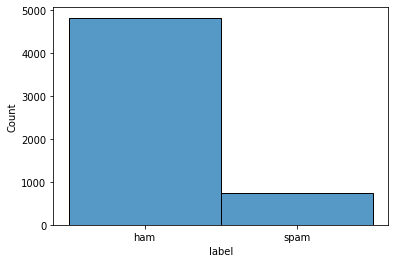

In [8]:
sns.histplot(x = 'label', data = dataset)
plt.show()

In [9]:
dataset['Spam'] = dataset['label'].apply(lambda x:1 if x=='spam' else 0)
dataset.head()

,label,text,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
dataset.Spam.value_counts()

0    4825
1     747
Name: Spam, dtype: int64

In [11]:
X = dataset['text']
y = dataset['Spam']

In [12]:
X.shape

(5572,)

In [13]:
y.shape

(5572,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

In [15]:
X_train.shape

(3900,)

In [16]:
X_test.shape

(1672,)

In [17]:
y_train.shape

(3900,)

In [18]:
y_test.shape

(1672,)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train.values)
X_test_cv = cv.transform(X_test)

In [25]:
X_train_cv.shape

(3900, 7206)

In [26]:
X_train_np = X_train_cv.toarray()

In [27]:
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_np,y_train)

DecisionTreeClassifier()

In [29]:
y_pred_dtc = dtc.predict(X_test_cv)

In [30]:
y_pred_dtc

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_pred_dtc, y_test)

0.9671052631578947

In [32]:
classification_report(y_pred_dtc,y_test)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98      1466\n           1       0.84      0.90      0.87       206\n\n    accuracy                           0.97      1672\n   macro avg       0.92      0.94      0.93      1672\nweighted avg       0.97      0.97      0.97      1672\n'

In [33]:
confusion_matrix(y_pred_dtc,y_test)

array([[1432,   34],
       [  21,  185]])

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train_cv,y_train)

RandomForestClassifier()

In [35]:
rft_pred = rfc_model.predict(X_test_cv)

In [36]:
accuracy_score(rft_pred,y_test)

0.9760765550239234

In [37]:
confusion_matrix(rft_pred,y_test)

array([[1453,   40],
       [   0,  179]])

In [38]:
rft_pred[0:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [39]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_cv,y_train)

LogisticRegression()

In [40]:
log_pred = log_model.predict(X_test_cv)

In [41]:
accuracy_score(log_pred,y_test)

0.9778708133971292